In [13]:
import tensorflow as tf
from tensorflow.keras.models import clone_model
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np

mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

model1 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

earlystp = EarlyStopping(monitor="loss", patience=20, verbose=1, mode='auto')



In [8]:
bs = [16]
models = [model1]
num_models = 10
for i in range(1, num_models):    
    models.append(clone_model(model1))
    # from 8 to 4096
    bs.append(int(2**(4 + i/(num_models-1)*(12-4))))
print(bs)

[16, 29, 54, 101, 188, 348, 645, 1194, 2211, 4096]


In [14]:
epochlist = \
[100, 100, 150, 150, 200, 200, 300, 400, 500, 750]
from tqdm import tqdm
for b,md, epochs in zip(bs,models, epochlist):
    
    batchsize = b
    optimizer = tf.keras.optimizers.Adam(lr=0.01)
    md.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#     for j in range(epochs):
#         print("Epoch {}/{}".format(j+1, epochs), end='\r')
#         md.fit(x_train, y_train, epochs=1, batch_size=batchsize, callbacks=[earlystp], verbose=1)
    md.fit(x_train, y_train, epochs=epochs, batch_size=batchsize, verbose=1, callbacks=[earlystp])
    

Epoch 1/100
60000/60000 [==============================] - 8s 142us/step - loss: 0.3637 - acc: 0.9664
Epoch 2/100
60000/60000 [==============================] - 7s 122us/step - loss: 0.3401 - acc: 0.9682
Epoch 3/100
60000/60000 [==============================] - 7s 122us/step - loss: 0.3393 - acc: 0.9682
Epoch 4/100
60000/60000 [==============================] - 7s 121us/step - loss: 0.3199 - acc: 0.9683
Epoch 5/100
60000/60000 [==============================] - 7s 121us/step - loss: 0.3102 - acc: 0.9669
Epoch 6/100
60000/60000 [==============================] - 7s 122us/step - loss: 0.2991 - acc: 0.9675
Epoch 7/100
60000/60000 [==============================] - 7s 124us/step - loss: 0.3395 - acc: 0.9655
Epoch 8/100
60000/60000 [==============================] - 7s 124us/step - loss: 0.3122 - acc: 0.9680
Epoch 9/100
60000/60000 [==============================] - 7s 124us/step - loss: 0.3213 - acc: 0.9673
Epoch 10/100
60000/60000 [==============================] - 7s 124us/step - loss: 

60000/60000 [==============================] - 5s 76us/step - loss: 0.2406 - acc: 0.9720
Epoch 35/100
60000/60000 [==============================] - 5s 81us/step - loss: 0.2449 - acc: 0.9727
Epoch 36/100
60000/60000 [==============================] - 5s 84us/step - loss: 0.2391 - acc: 0.9744
Epoch 37/100
60000/60000 [==============================] - 4s 72us/step - loss: 0.2478 - acc: 0.9754
Epoch 38/100
60000/60000 [==============================] - 4s 71us/step - loss: 0.2344 - acc: 0.9761
Epoch 39/100
60000/60000 [==============================] - 4s 71us/step - loss: 0.2394 - acc: 0.9759
Epoch 40/100
60000/60000 [==============================] - 4s 71us/step - loss: 0.2224 - acc: 0.9766
Epoch 41/100
60000/60000 [==============================] - 4s 71us/step - loss: 0.2304 - acc: 0.9768
Epoch 42/100
60000/60000 [==============================] - 4s 71us/step - loss: 0.2177 - acc: 0.9764
Epoch 43/100
60000/60000 [==============================] - 4s 71us/step - loss: 0.2408 - acc: 

60000/60000 [==============================] - 2s 40us/step - loss: 0.2392 - acc: 0.9826
Epoch 39/150
60000/60000 [==============================] - 2s 39us/step - loss: 0.2202 - acc: 0.9839
Epoch 40/150
60000/60000 [==============================] - 2s 40us/step - loss: 0.2218 - acc: 0.9838
Epoch 41/150
60000/60000 [==============================] - 2s 39us/step - loss: 0.2301 - acc: 0.9833
Epoch 00041: early stopping
Epoch 1/150
60000/60000 [==============================] - 3s 46us/step - loss: 0.1837 - acc: 0.9876
Epoch 2/150
60000/60000 [==============================] - 1s 23us/step - loss: 0.1898 - acc: 0.9872
Epoch 3/150
60000/60000 [==============================] - 1s 22us/step - loss: 0.2011 - acc: 0.9866
Epoch 4/150
60000/60000 [==============================] - 1s 24us/step - loss: 0.2107 - acc: 0.9860
Epoch 5/150
60000/60000 [==============================] - 1s 23us/step - loss: 0.2314 - acc: 0.9848
Epoch 6/150
60000/60000 [==============================] - 1s 23us/step 

60000/60000 [==============================] - 1s 9us/step - loss: 0.0519 - acc: 0.9894
Epoch 36/200
60000/60000 [==============================] - 1s 9us/step - loss: 0.0396 - acc: 0.9913
Epoch 37/200
60000/60000 [==============================] - 1s 9us/step - loss: 0.0381 - acc: 0.9919
Epoch 38/200
60000/60000 [==============================] - 1s 9us/step - loss: 0.0427 - acc: 0.9912
Epoch 39/200
60000/60000 [==============================] - 1s 9us/step - loss: 0.0441 - acc: 0.9908
Epoch 40/200
60000/60000 [==============================] - 1s 9us/step - loss: 0.0502 - acc: 0.9909
Epoch 41/200
60000/60000 [==============================] - 1s 9us/step - loss: 0.0420 - acc: 0.9917
Epoch 42/200
60000/60000 [==============================] - 1s 9us/step - loss: 0.0553 - acc: 0.9899
Epoch 43/200
60000/60000 [==============================] - 1s 9us/step - loss: 0.0535 - acc: 0.9906
Epoch 44/200
60000/60000 [==============================] - 1s 9us/step - loss: 0.0445 - acc: 0.9917
Epo

60000/60000 [==============================] - 0s 7us/step - loss: 0.0283 - acc: 0.9939
Epoch 60/300
60000/60000 [==============================] - 0s 8us/step - loss: 0.0480 - acc: 0.9916
Epoch 61/300
60000/60000 [==============================] - 0s 7us/step - loss: 0.0271 - acc: 0.9945
Epoch 62/300
60000/60000 [==============================] - 0s 7us/step - loss: 0.0246 - acc: 0.9948
Epoch 63/300
60000/60000 [==============================] - 0s 7us/step - loss: 0.0272 - acc: 0.9943
Epoch 64/300
60000/60000 [==============================] - 0s 8us/step - loss: 0.0265 - acc: 0.9947
Epoch 65/300
60000/60000 [==============================] - 1s 9us/step - loss: 0.0250 - acc: 0.9951
Epoch 66/300
60000/60000 [==============================] - 0s 7us/step - loss: 0.0262 - acc: 0.9947
Epoch 67/300
60000/60000 [==============================] - 1s 10us/step - loss: 0.0282 - acc: 0.9946
Epoch 68/300
60000/60000 [==============================] - 1s 9us/step - loss: 0.0373 - acc: 0.9930
Ep

60000/60000 [==============================] - 0s 5us/step - loss: 0.1004 - acc: 0.9686
Epoch 3/500
60000/60000 [==============================] - 0s 5us/step - loss: 0.0719 - acc: 0.9777
Epoch 4/500
60000/60000 [==============================] - 0s 5us/step - loss: 0.0526 - acc: 0.9840
Epoch 5/500
60000/60000 [==============================] - 0s 5us/step - loss: 0.0430 - acc: 0.9859
Epoch 6/500
60000/60000 [==============================] - 0s 4us/step - loss: 0.0357 - acc: 0.9885
Epoch 7/500
60000/60000 [==============================] - 0s 4us/step - loss: 0.0293 - acc: 0.9906
Epoch 8/500
60000/60000 [==============================] - 0s 5us/step - loss: 0.0268 - acc: 0.9917
Epoch 9/500
60000/60000 [==============================] - 0s 6us/step - loss: 0.0225 - acc: 0.9928
Epoch 10/500
60000/60000 [==============================] - 0s 6us/step - loss: 0.0210 - acc: 0.9934
Epoch 11/500
60000/60000 [==============================] - 0s 5us/step - loss: 0.0202 - acc: 0.9938
Epoch 12/5

60000/60000 [==============================] - 0s 5us/step - loss: 0.0058 - acc: 0.9987
Epoch 28/750
60000/60000 [==============================] - 0s 5us/step - loss: 0.0054 - acc: 0.9987
Epoch 29/750
60000/60000 [==============================] - 0s 4us/step - loss: 0.0061 - acc: 0.9985
Epoch 30/750
60000/60000 [==============================] - 0s 4us/step - loss: 0.0052 - acc: 0.9987
Epoch 31/750
60000/60000 [==============================] - 0s 5us/step - loss: 0.0047 - acc: 0.9989
Epoch 32/750
60000/60000 [==============================] - 0s 4us/step - loss: 0.0054 - acc: 0.9984
Epoch 33/750
60000/60000 [==============================] - 0s 4us/step - loss: 0.0047 - acc: 0.9987
Epoch 34/750
60000/60000 [==============================] - 0s 5us/step - loss: 0.0048 - acc: 0.9986
Epoch 35/750
60000/60000 [==============================] - 0s 4us/step - loss: 0.0051 - acc: 0.9985
Epoch 36/750
60000/60000 [==============================] - 0s 5us/step - loss: 0.0051 - acc: 0.9986
Epo

In [ ]:
i = 0
models[i].fit(x_train, y_train, epochs=200, batch_size=bs[i], verbose=1)

In [15]:
# Thanks to Marvin
from tensorflow.keras import backend as K
def get_gradients_norm(model, inputs, outputs):
    #from https://stackoverflow.com/questions/51140950/how-to-obtain-the-gradients-in-keras
    """ Gets gradient of model for given inputs and outputs for all weights"""
    grads = model.optimizer.get_gradients(model.total_loss, model.trainable_weights)
    symb_inputs = (model._feed_inputs + model._feed_targets + model._feed_sample_weights)
    f = K.function(symb_inputs, grads)
    x, y, sample_weight = model._standardize_user_data(inputs, outputs)
    output_grad = f(x + y + sample_weight)
    grad_sum = 0
    for i in range(len(output_grad)):
        grad_sum += np.sum(output_grad[i])**2
    grad_norm = grad_sum ** 0.5
    return grad_norm

In [16]:
import tqdm


train_losses = []
train_accus = []
train_sensis = []
test_losses = []
test_accus = []
test_sensis = []

for i, model in enumerate(models):
    loss1, accu1 = model.evaluate(x_train, y_train, verbose=1, batch_size=256)
    loss2, accu2 = model.evaluate(x_test, y_test, verbose=1, batch_size=256)
    
    gradnorm1 = get_gradients_norm(model, x_train, y_train)
    gradnorm2 = get_gradients_norm(model, x_test, y_test)
    
    train_losses.append(loss1)
    train_accus.append(accu1)
    train_sensis.append(gradnorm1)
    test_losses.append(loss2)
    test_accus.append(accu2)
    test_sensis.append(gradnorm2)

10000/10000 [==============================] - 0s 9us/step


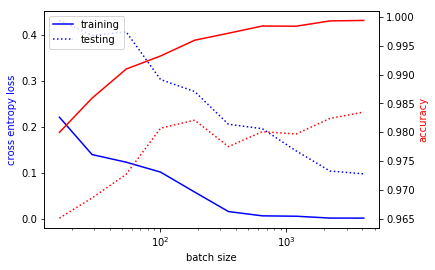

In [17]:
# loss/accu to batchsize

import matplotlib.pyplot as plt

plt.plot(bs, train_losses, 'b')
plt.plot(bs, test_losses, 'b:')
plt.xlabel('batch size')
plt.xscale('log')
label = plt.ylabel('cross entropy loss')
label.set_color("blue")
plt.legend(['training', 'testing'], loc='upper left')

plt.twinx()
plt.plot(bs, train_accus, 'r')
plt.plot(bs, test_accus, 'r:')

label = plt.ylabel('accuracy')
label.set_color("red")

plt.show()

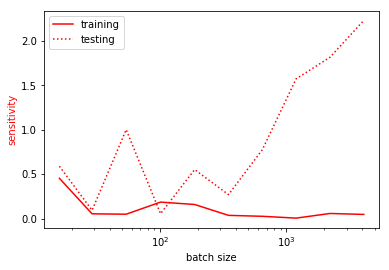

In [18]:
# sensitivity to batchsize
plt.plot(bs, train_sensis, 'r')
plt.plot(bs, test_sensis, 'r:')
plt.xlabel('batch size')
plt.xscale('log')
label = plt.ylabel('sensitivity')
label.set_color("red")
plt.legend(['training', 'testing'], loc='upper left')